In [1]:
import matplotlib.pyplot as plt
from lmfit.models import ExpressionModel, Model
import numpy as np

In [28]:
# Provide inputs for calibrations in 2d arrays: dimension 1 = source, dimension 2 = datapoint or error
# Ba133, Eu152, Co60
arr_chan = np.array([[223.476, 266.777, 353.768, 399.325], [171.599, 334.581, 444.01, 497.83, 1046.25, 1191.05, 1349.589, 1549.13, 1591.98, 2076.771], [1692.073, 1953.032]], dtype = 'object')
arr_E = np.array([[276.3989, 302.8508, 356.0129, 383.8485], [244.6974, 344.2785, 411.1165, 443.9606, 778.9045, 867.38, 964.057, 1085.837, 1112.076, 1408.013], [1173.228, 1332.492]], dtype = 'object')
arr_xerr = np.array([[0.005, 0.004, 0.003, 0.007], [0.007, 0.005, 0.03, 0.02, 0.01, 0.03, 0.009, 0.04, 0.02, 0.005], [0.004, 0.004]], dtype = 'object')
arr_yerr = np.array([[0.0012, 0.0005, 0.0007, 0.0012], [0.0008, 0.0012, 0.0012, 0.0016, 0.0024, 0.003, 0.005, 0.01, 0.003, 0.003], [0.003, 0.004]], dtype = 'object')

# Possibility for plotting with different labels/colors
source_names = np.array(["Ba133", "Eu152", "Co60"])
source_colors = np.array(['c', 'm', 'y'])

In [25]:
# Flatten the arrays and set the figure size
vec_chan = np.array([])
vec_E = np.array([])
vec_xerr = np.array([])
vec_yerr = np.array([])

for i in range(len(arr_E)):                                 # Assign the values and uncertainties
    vec_chan = np.append(vec_chan, arr_chan[i])
    vec_E = np.append(vec_E, arr_E[i])
    vec_xerr = np.append(vec_xerr, arr_xerr[i])
    vec_yerr = np.append(vec_yerr, arr_yerr[i])


plt.rcParams["figure.figsize"] = (12, 4);

In [26]:
# Perform linear and quadratic fits and calculate the residues
model1 = ExpressionModel("a + b*x") 
model2 = ExpressionModel("a + b*x + c*x**2") 
result1 = model1.fit(vec_E, x = vec_chan, a = 1, b = 1/3)
result2 = model2.fit(vec_E, x = vec_chan, a = 1, b = 1/3, c = 0)

print(result1.fit_report())
#print(result2.fit_report())

channel = np.linspace(0, 2500, 100)
fit1 = result1.params['a'] + channel * result1.params['b']
fit2 = result2.params['a'] + channel * result2.params['b'] + channel**2 * result2.params['c']

diff1 = []
diff2 = []
for i in range(len(vec_E)):
    diff1.append(vec_E[i]-result1.best_fit[i])
    diff2.append(vec_E[i]-result2.best_fit[i])

[[Model]]
    Model(_eval)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 16
    # variables        = 2
    chi-square         = 0.04200128
    reduced chi-square = 0.00300009
    Akaike info crit   = -91.0823016
    Bayesian info crit = -89.5371242
[[Variables]]
    a:  139.983919 +/- 0.02399166 (0.02%) (init = 1)
    b:  0.61061104 +/- 2.0817e-05 (0.00%) (init = 0.3333333)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.821


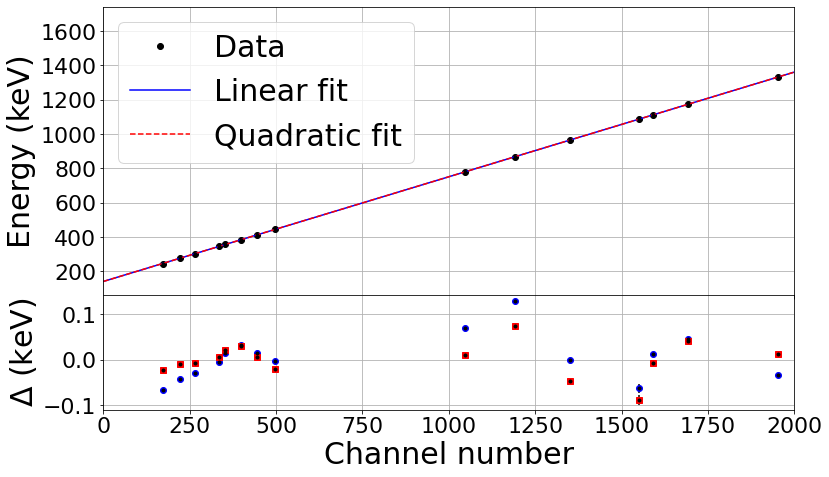

In [27]:
# Plot the results
fig = plt.figure(1)
frame1=fig.add_axes((.1,.2+.4,.8,.6 +.4))
frame1.set_xticklabels([])


plt.plot(vec_chan, vec_E, 'o', label = "Data", color = "Black")
plt.errorbar(vec_chan, vec_E, xerr = vec_xerr, yerr = vec_yerr, fmt='k.')


plt.plot(channel, fit1, 'b-', label = 'Linear fit')
plt.plot(channel, fit2, 'r--', label = 'Quadratic fit')
plt.xlim([0, 2000])
plt.legend(loc = 'best', fontsize = 30)
plt.ylabel("Energy (keV)", fontsize = 30)
plt.yticks(size = 22)
plt.grid()


# Plot the residues
frame2=fig.add_axes((.1,.2,.8,.4)) 

plt.plot(vec_chan, diff1, 'o', label = "Linear fit", color = "Blue")
plt.errorbar(vec_chan, diff1, xerr = vec_xerr, yerr = vec_yerr, fmt='k.')
plt.plot(vec_chan, diff2, 's', label = "Quadratic fit", color = 'Red')
plt.errorbar(vec_chan, diff2, xerr = vec_xerr, yerr = vec_yerr, fmt='k.')

plt.xlabel("Channel number", fontsize = 30)
plt.ylabel("$\Delta$ (keV)", fontsize = 30)
plt.xlim([0, 2000])
plt.xticks(size = 22)
plt.yticks(size = 22)
plt.grid()
#plt.savefig('calibration.pdf', bbox_inches='tight')
plt.show()